In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
df = pd.read_csv("E:/pps project/Real Estate Price Prediction/data/after_preprocessing.csv")
df.head()

,Unnamed: 0,AREA,INT_SQFT,DIST_MAINROAD,N_BEDROOM,N_BATHROOM,N_ROOM,SALE_COND,PARK_FACIL,BUILDTYPE,UTILITY_AVAIL,STREET,MZZONE,QS_ROOMS,QS_BATHROOM,QS_BEDROOM,QS_OVERALL,COMMIS,SALES_PRICE
0,0,Karapakkam,1004,131,1.0,1.0,3,AbNormal,Yes,Commercial,AllPub,Paved,A,4.0,3.9,4.9,4.266667,144400,7600000
1,1,Anna Nagar,1986,26,2.0,1.0,5,AbNormal,No,Commercial,AllPub,Gravel,RH,4.9,4.2,2.5,3.866667,304049,21717770
2,2,Adyar,909,70,1.0,1.0,3,AbNormal,Yes,Commercial,ELO,Gravel,RL,4.1,3.8,2.2,3.366667,92114,13159200
3,3,Velachery,1855,14,3.0,2.0,5,Family,No,Others,NoSewr,Paved,I,4.7,3.9,3.6,4.066667,77042,9630290
4,4,Karapakkam,1226,84,1.0,1.0,3,AbNormal,Yes,Others,AllPub,Gravel,C,3.0,2.5,4.1,3.200000,74063,7406250


In [4]:
df.drop("Unnamed: 0",axis=1,inplace=True)

In [5]:
df.head()

,AREA,INT_SQFT,DIST_MAINROAD,N_BEDROOM,N_BATHROOM,N_ROOM,SALE_COND,PARK_FACIL,BUILDTYPE,UTILITY_AVAIL,STREET,MZZONE,QS_ROOMS,QS_BATHROOM,QS_BEDROOM,QS_OVERALL,COMMIS,SALES_PRICE
0,Karapakkam,1004,131,1.0,1.0,3,AbNormal,Yes,Commercial,AllPub,Paved,A,4.0,3.9,4.9,4.266667,144400,7600000
1,Anna Nagar,1986,26,2.0,1.0,5,AbNormal,No,Commercial,AllPub,Gravel,RH,4.9,4.2,2.5,3.866667,304049,21717770
2,Adyar,909,70,1.0,1.0,3,AbNormal,Yes,Commercial,ELO,Gravel,RL,4.1,3.8,2.2,3.366667,92114,13159200
3,Velachery,1855,14,3.0,2.0,5,Family,No,Others,NoSewr,Paved,I,4.7,3.9,3.6,4.066667,77042,9630290
4,Karapakkam,1226,84,1.0,1.0,3,AbNormal,Yes,Others,AllPub,Gravel,C,3.0,2.5,4.1,3.200000,74063,7406250


In [6]:
df.corr()

,INT_SQFT,DIST_MAINROAD,N_BEDROOM,N_BATHROOM,N_ROOM,QS_ROOMS,QS_BATHROOM,QS_BEDROOM,QS_OVERALL,COMMIS,SALES_PRICE
INT_SQFT,1.000000,0.002022,0.786263,0.515290,0.951279,0.019850,-0.008337,0.008865,0.011682,0.571076,0.612125
DIST_MAINROAD,0.002022,1.000000,-0.002723,0.001850,0.002301,0.002237,-0.029468,0.001554,-0.014911,0.010994,0.018783
N_BEDROOM,0.786263,-0.002723,1.000000,0.755207,0.840209,0.014948,-0.007534,0.015752,0.013271,0.430446,0.330987
N_BATHROOM,0.515290,0.001850,0.755207,1.000000,0.568541,0.013376,-0.012043,0.013191,0.008283,0.256726,0.108834
N_ROOM,0.951279,0.002301,0.840209,0.568541,1.000000,0.016524,-0.007545,0.015072,0.013783,0.533343,0.602760
QS_ROOMS,0.019850,0.002237,0.014948,0.013376,0.016524,1.000000,0.008828,0.007789,0.585743,0.009377,0.021967
QS_BATHROOM,-0.008337,-0.029468,-0.007534,-0.012043,-0.007545,0.008828,1.000000,-0.011745,0.578301,-0.000471,-0.011377
QS_BEDROOM,0.008865,0.001554,0.015752,0.013191,0.015072,0.007789,-0.011745,1.000000,0.570796,0.020118,0.018804
QS_OVERALL,0.011682,-0.014911,0.013271,0.008283,0.013783,0.585743,0.578301,0.570796,1.000000,0.016660,0.016835
COMMIS,0.571076,0.010994,0.430446,0.256726,0.533343,0.009377,-0.000471,0.020118,0.016660,1.000000,0.626275


In [7]:
# After the above correlation, data, it is seem that there are golden features
# INT_SQFT, N_BEDROOM, N_BATHROOM, N_ROOOM, COMMIS, QS_ROOMS
# Eliminatinbg Features: QS_BATHROOM, QS_OVERALL

In [8]:
# Let's eliminate QS_BATHROOM, QS_OVERALL

df.drop("QS_BATHROOM", axis=1, inplace=True)
df.drop("QS_OVERALL", axis=1, inplace=True)

<BarContainer object of 7109 artists>

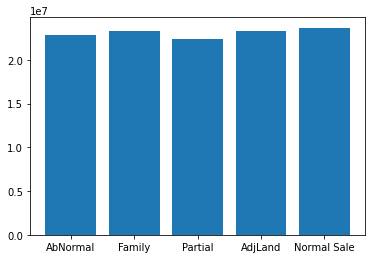

In [9]:
plt.bar(df["SALE_COND"],df["SALES_PRICE"])

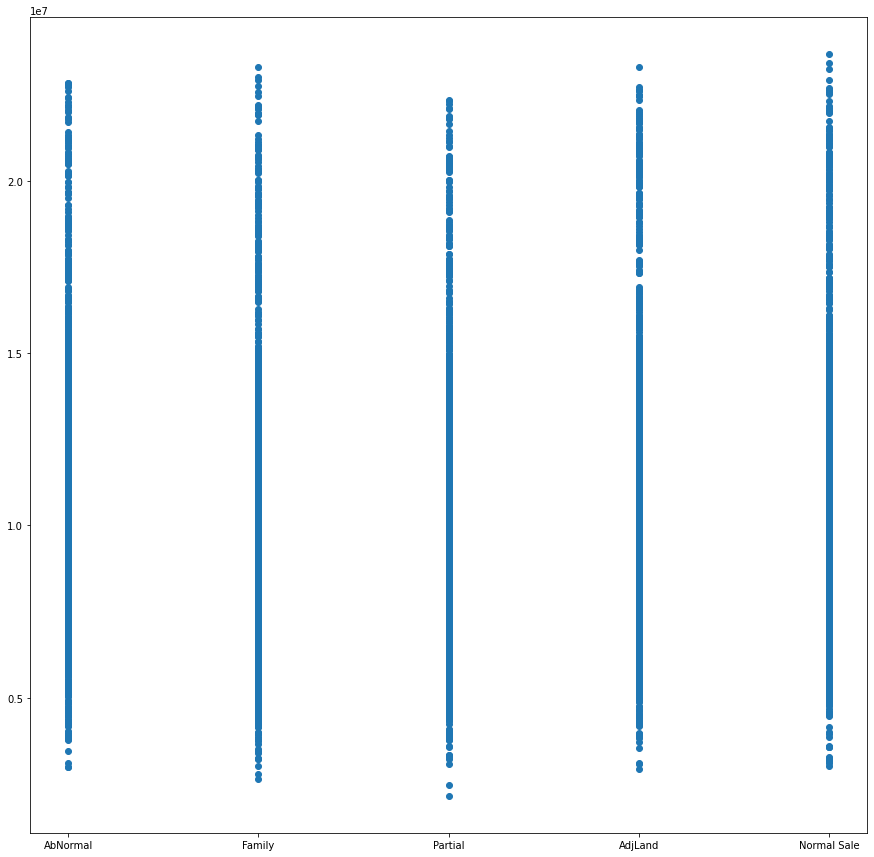

In [10]:
plt.figure(figsize=(15,15))
plt.scatter(df["SALE_COND"],df["SALES_PRICE"])

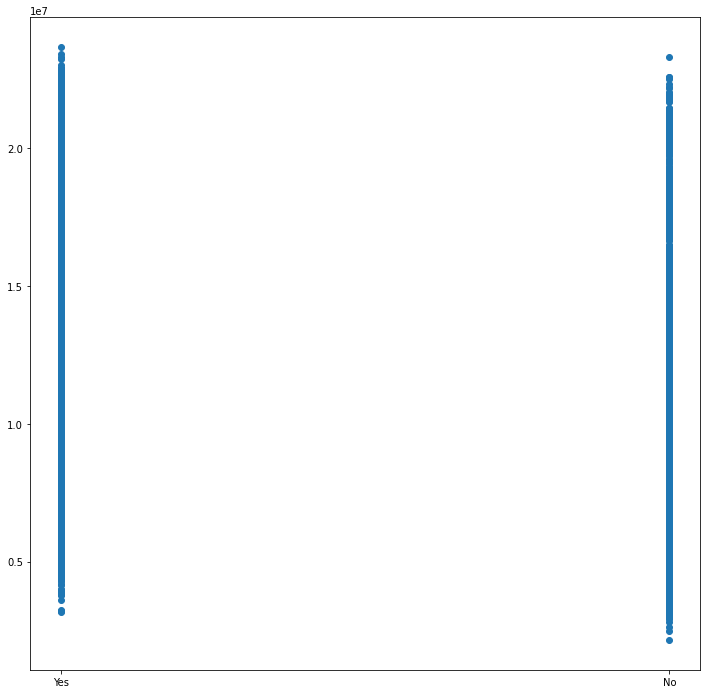

In [11]:
plt.figure(figsize=(12,12))
plt.scatter(df["PARK_FACIL"],df["SALES_PRICE"])

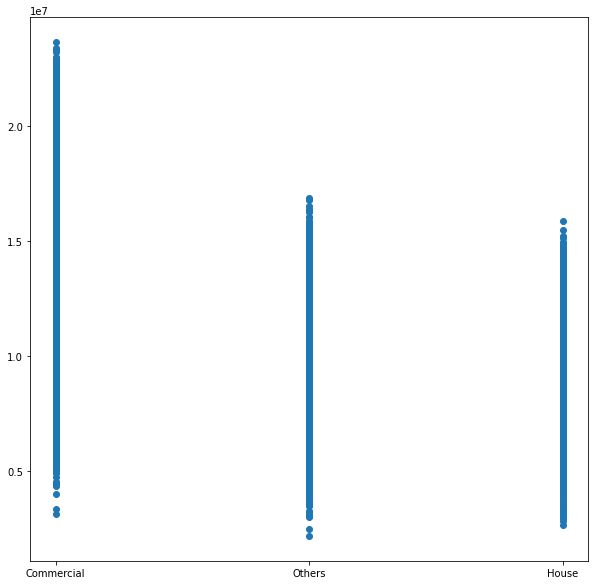

In [12]:
plt.figure(figsize=(10,10))
plt.scatter(df["BUILDTYPE"],df["SALES_PRICE"])

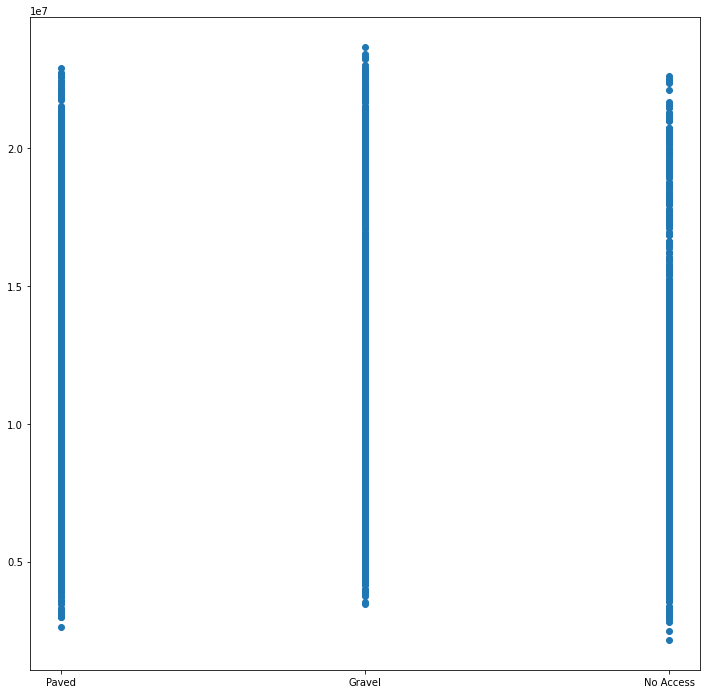

In [13]:
plt.figure(figsize=(12,12))
plt.scatter(df["STREET"],df["SALES_PRICE"])

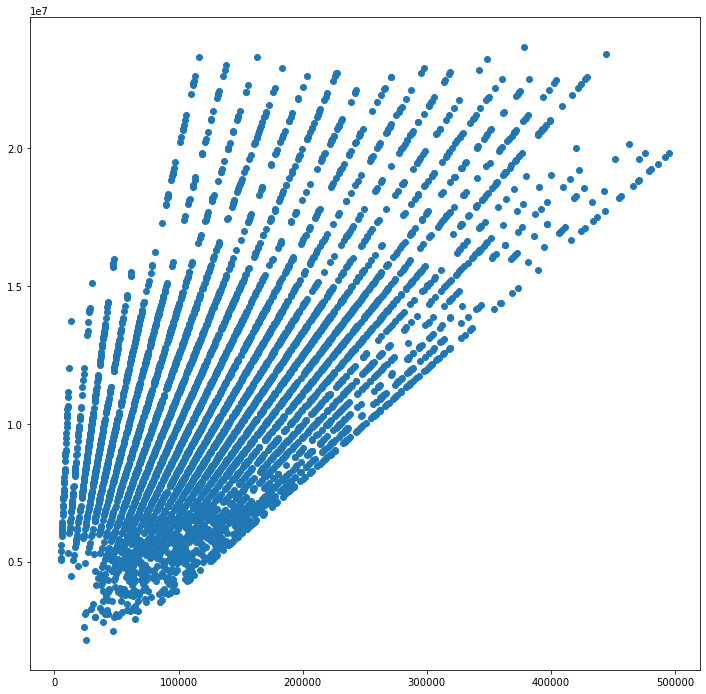

In [14]:
plt.figure(figsize=(12,12))
plt.scatter(df["COMMIS"],df["SALES_PRICE"])

In [15]:
df_n = df.drop("COMMIS",axis=1)

In [16]:
# Dividing whole data into input & target data

x = df.drop("SALES_PRICE",axis=1)
y = df["SALES_PRICE"]

In [17]:
from sklearn.model_selection import train_test_split

train_x,test_x,train_y,test_y = train_test_split(x,y,test_size=0.2,random_state=0)

In [18]:
# Import Linear Regressio
from sklearn.linear_model import LinearRegression

linreg = LinearRegression()

In [19]:
df["AREA"].dtypes

dtype('O')

In [20]:
df["AREA"].value_counts()

Chrompet      1702
Karapakkam    1366
KK Nagar       997
Velachery      981
Anna Nagar     788
Adyar          774
T Nagar        501
Name: AREA, dtype: int64

In [21]:
# Fitting the model111111111a
linreg.fit(train_x,train_y)

ValueError: could not convert string to float: 'KK Nagar'

In [22]:
df.head()

,AREA,INT_SQFT,DIST_MAINROAD,N_BEDROOM,N_BATHROOM,N_ROOM,SALE_COND,PARK_FACIL,BUILDTYPE,UTILITY_AVAIL,STREET,MZZONE,QS_ROOMS,QS_BEDROOM,COMMIS,SALES_PRICE
0,Karapakkam,1004,131,1.0,1.0,3,AbNormal,Yes,Commercial,AllPub,Paved,A,4.0,4.9,144400,7600000
1,Anna Nagar,1986,26,2.0,1.0,5,AbNormal,No,Commercial,AllPub,Gravel,RH,4.9,2.5,304049,21717770
2,Adyar,909,70,1.0,1.0,3,AbNormal,Yes,Commercial,ELO,Gravel,RL,4.1,2.2,92114,13159200
3,Velachery,1855,14,3.0,2.0,5,Family,No,Others,NoSewr,Paved,I,4.7,3.6,77042,9630290
4,Karapakkam,1226,84,1.0,1.0,3,AbNormal,Yes,Others,AllPub,Gravel,C,3.0,4.1,74063,7406250


In [23]:
df_1 = pd.get_dummies(df)

In [24]:
df_1

,INT_SQFT,DIST_MAINROAD,N_BEDROOM,N_BATHROOM,N_ROOM,QS_ROOMS,QS_BEDROOM,COMMIS,SALES_PRICE,AREA_Adyar,...,UTILITY_AVAIL_NoSewr,STREET_Gravel,STREET_No Access,STREET_Paved,MZZONE_A,MZZONE_C,MZZONE_I,MZZONE_RH,MZZONE_RL,MZZONE_RM
0,1004,131,1.0,1.0,3,4.0,4.9,144400,7600000,0,...,0,0,0,1,1,0,0,0,0,0
1,1986,26,2.0,1.0,5,4.9,2.5,304049,21717770,0,...,0,1,0,0,0,0,0,1,0,0
2,909,70,1.0,1.0,3,4.1,2.2,92114,13159200,1,...,0,1,0,0,0,0,0,0,1,0
3,1855,14,3.0,2.0,5,4.7,3.6,77042,9630290,0,...,1,0,0,1,0,0,1,0,0,0
4,1226,84,1.0,1.0,3,3.0,4.1,74063,7406250,0,...,0,1,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7104,598,51,1.0,1.0,2,3.0,2.4,107060,5353000,0,...,0,0,1,0,0,0,0,0,0,1
7105,1897,52,3.0,2.0,5,3.6,3.3,205551,10818480,0,...,0,0,1,0,0,0,0,1,0,0
7106,1614,152,2.0,1.0,4,4.3,2.9,167028,8351410,0,...,0,1,0,0,0,0,1,0,0,0
7107,787,40,1.0,1.0,2,4.6,4.1,119098,8507000,0,...,0,0,0,1,0,0,0,0,1,0


In [25]:
x = df_1.drop("SALES_PRICE",axis=1)
y = df["SALES_PRICE"]

In [26]:
x.head()

,INT_SQFT,DIST_MAINROAD,N_BEDROOM,N_BATHROOM,N_ROOM,QS_ROOMS,QS_BEDROOM,COMMIS,AREA_Adyar,AREA_Anna Nagar,...,UTILITY_AVAIL_NoSewr,STREET_Gravel,STREET_No Access,STREET_Paved,MZZONE_A,MZZONE_C,MZZONE_I,MZZONE_RH,MZZONE_RL,MZZONE_RM
0,1004,131,1.0,1.0,3,4.0,4.9,144400,0,0,...,0,0,0,1,1,0,0,0,0,0
1,1986,26,2.0,1.0,5,4.9,2.5,304049,0,1,...,0,1,0,0,0,0,0,1,0,0
2,909,70,1.0,1.0,3,4.1,2.2,92114,1,0,...,0,1,0,0,0,0,0,0,1,0
3,1855,14,3.0,2.0,5,4.7,3.6,77042,0,0,...,1,0,0,1,0,0,1,0,0,0
4,1226,84,1.0,1.0,3,3.0,4.1,74063,0,0,...,0,1,0,0,0,1,0,0,0,0


In [27]:
train_x,test_x,train_y,test_y = train_test_split(x,y,test_size=0.2,random_state=0)

In [28]:
linreg.fit(train_x,train_y)

LinearRegression()

In [29]:
train_y_predict = linreg.predict(train_x)

In [30]:
from sklearn.metrics import mean_absolute_error as mae

k_train = mae(train_y_predict,train_y)

In [31]:
k_train

601208.0290746134

In [32]:
len(train_x)

5687

In [33]:
test_y_predict = linreg.predict(test_x)

In [34]:
k_test = mae(test_y_predict,test_y)

In [35]:
k_test

605197.1329400203

In [36]:
#############################################################################

In [37]:
df_1.head()

,INT_SQFT,DIST_MAINROAD,N_BEDROOM,N_BATHROOM,N_ROOM,QS_ROOMS,QS_BEDROOM,COMMIS,SALES_PRICE,AREA_Adyar,...,UTILITY_AVAIL_NoSewr,STREET_Gravel,STREET_No Access,STREET_Paved,MZZONE_A,MZZONE_C,MZZONE_I,MZZONE_RH,MZZONE_RL,MZZONE_RM
0,1004,131,1.0,1.0,3,4.0,4.9,144400,7600000,0,...,0,0,0,1,1,0,0,0,0,0
1,1986,26,2.0,1.0,5,4.9,2.5,304049,21717770,0,...,0,1,0,0,0,0,0,1,0,0
2,909,70,1.0,1.0,3,4.1,2.2,92114,13159200,1,...,0,1,0,0,0,0,0,0,1,0
3,1855,14,3.0,2.0,5,4.7,3.6,77042,9630290,0,...,1,0,0,1,0,0,1,0,0,0
4,1226,84,1.0,1.0,3,3.0,4.1,74063,7406250,0,...,0,1,0,0,0,1,0,0,0,0


In [38]:
df.head()

,AREA,INT_SQFT,DIST_MAINROAD,N_BEDROOM,N_BATHROOM,N_ROOM,SALE_COND,PARK_FACIL,BUILDTYPE,UTILITY_AVAIL,STREET,MZZONE,QS_ROOMS,QS_BEDROOM,COMMIS,SALES_PRICE
0,Karapakkam,1004,131,1.0,1.0,3,AbNormal,Yes,Commercial,AllPub,Paved,A,4.0,4.9,144400,7600000
1,Anna Nagar,1986,26,2.0,1.0,5,AbNormal,No,Commercial,AllPub,Gravel,RH,4.9,2.5,304049,21717770
2,Adyar,909,70,1.0,1.0,3,AbNormal,Yes,Commercial,ELO,Gravel,RL,4.1,2.2,92114,13159200
3,Velachery,1855,14,3.0,2.0,5,Family,No,Others,NoSewr,Paved,I,4.7,3.6,77042,9630290
4,Karapakkam,1226,84,1.0,1.0,3,AbNormal,Yes,Others,AllPub,Gravel,C,3.0,4.1,74063,7406250


In [39]:
df_n.head()

,AREA,INT_SQFT,DIST_MAINROAD,N_BEDROOM,N_BATHROOM,N_ROOM,SALE_COND,PARK_FACIL,BUILDTYPE,UTILITY_AVAIL,STREET,MZZONE,QS_ROOMS,QS_BEDROOM,SALES_PRICE
0,Karapakkam,1004,131,1.0,1.0,3,AbNormal,Yes,Commercial,AllPub,Paved,A,4.0,4.9,7600000
1,Anna Nagar,1986,26,2.0,1.0,5,AbNormal,No,Commercial,AllPub,Gravel,RH,4.9,2.5,21717770
2,Adyar,909,70,1.0,1.0,3,AbNormal,Yes,Commercial,ELO,Gravel,RL,4.1,2.2,13159200
3,Velachery,1855,14,3.0,2.0,5,Family,No,Others,NoSewr,Paved,I,4.7,3.6,9630290
4,Karapakkam,1226,84,1.0,1.0,3,AbNormal,Yes,Others,AllPub,Gravel,C,3.0,4.1,7406250


In [40]:
df_n = pd.get_dummies(df_n)

In [41]:
df_n.head()

,INT_SQFT,DIST_MAINROAD,N_BEDROOM,N_BATHROOM,N_ROOM,QS_ROOMS,QS_BEDROOM,SALES_PRICE,AREA_Adyar,AREA_Anna Nagar,...,UTILITY_AVAIL_NoSewr,STREET_Gravel,STREET_No Access,STREET_Paved,MZZONE_A,MZZONE_C,MZZONE_I,MZZONE_RH,MZZONE_RL,MZZONE_RM
0,1004,131,1.0,1.0,3,4.0,4.9,7600000,0,0,...,0,0,0,1,1,0,0,0,0,0
1,1986,26,2.0,1.0,5,4.9,2.5,21717770,0,1,...,0,1,0,0,0,0,0,1,0,0
2,909,70,1.0,1.0,3,4.1,2.2,13159200,1,0,...,0,1,0,0,0,0,0,0,1,0
3,1855,14,3.0,2.0,5,4.7,3.6,9630290,0,0,...,1,0,0,1,0,0,1,0,0,0
4,1226,84,1.0,1.0,3,3.0,4.1,7406250,0,0,...,0,1,0,0,0,1,0,0,0,0


In [42]:
x = df_n.drop("SALES_PRICE", axis=1)
y = df_n["SALES_PRICE"]

In [43]:
x.head()

,INT_SQFT,DIST_MAINROAD,N_BEDROOM,N_BATHROOM,N_ROOM,QS_ROOMS,QS_BEDROOM,AREA_Adyar,AREA_Anna Nagar,AREA_Chrompet,...,UTILITY_AVAIL_NoSewr,STREET_Gravel,STREET_No Access,STREET_Paved,MZZONE_A,MZZONE_C,MZZONE_I,MZZONE_RH,MZZONE_RL,MZZONE_RM
0,1004,131,1.0,1.0,3,4.0,4.9,0,0,0,...,0,0,0,1,1,0,0,0,0,0
1,1986,26,2.0,1.0,5,4.9,2.5,0,1,0,...,0,1,0,0,0,0,0,1,0,0
2,909,70,1.0,1.0,3,4.1,2.2,1,0,0,...,0,1,0,0,0,0,0,0,1,0
3,1855,14,3.0,2.0,5,4.7,3.6,0,0,0,...,1,0,0,1,0,0,1,0,0,0
4,1226,84,1.0,1.0,3,3.0,4.1,0,0,0,...,0,1,0,0,0,1,0,0,0,0


In [44]:
y.head()

0     7600000
1    21717770
2    13159200
3     9630290
4     7406250
Name: SALES_PRICE, dtype: int64

In [45]:
train_x,test_x,train_y,test_y = train_test_split(x,y,test_size=0.2,random_state=0)

In [46]:
linreg = LinearRegression()

In [47]:
linreg.fit(train_x,train_y)

LinearRegression()

In [48]:
train_predict_2 = linreg.predict(train_x)

In [49]:
k_train_1 = mae(train_predict_2,train_y)

In [50]:
k_train_1

615157.085925386

In [51]:
test_predict_2 = linreg.predict(test_x)

In [52]:
k_test_1 = mae(test_predict_2,test_y)

In [53]:
k_test_1

617826.5363317053

In [54]:
######################################################################

In [55]:
#  COMMIS to be dropped

In [56]:
df.drop("COMMIS", axis=1, inplace=True)

TypeError: unsupported operand type(s) for /: 'str' and 'int'

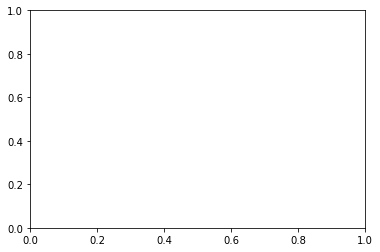

In [57]:
plt.boxplot(df["PARK_FACIL"])

In [ ]:
plt.figure(figsize=(15,15))
plt.boxplot(df["SALES_PRICE"])
plt.show()

In [ ]:
l = []
for i in range(0,len(df)):
    if(df["SALE_COND"][i] == "Partial"):
        l.append(df["SALES_PRICE"][i])

In [58]:
len(l)

NameError: name 'l' is not defined

In [59]:
l = pd.Series(l)

NameError: name 'l' is not defined

In [60]:
plt.figure(figsize=(12,12))
plt.boxplot(l)
plt.show()

NameError: name 'l' is not defined

<Figure size 864x864 with 0 Axes>

In [61]:
l = []
for i in range(0,len(df)):
    if(df["SALE_COND"][i] == "Partial"):
        if(df["SALES_PRICE"][i] < 2500000):
            l.append(df["SALES_PRICE"][i])

In [62]:
len(l)

2

In [63]:
for i in range(0,len(df)):
    if(df["SALE_COND"][i] == "Partial"):
        if(df["SALES_PRICE"][i] < 2500000):
            df.drop(i,axis=0,inplace=True)

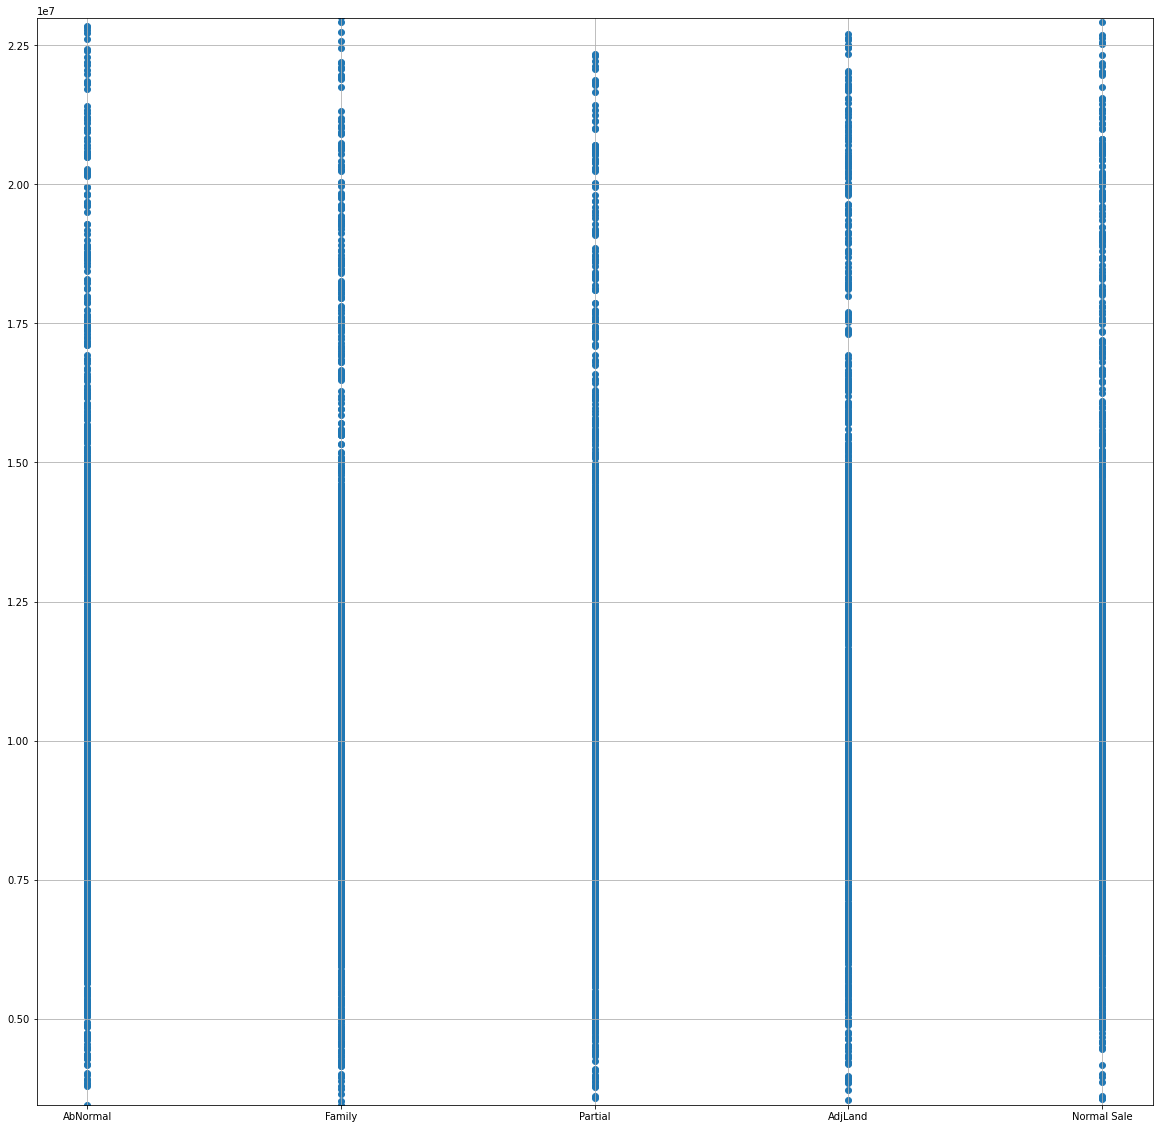

In [64]:
from matplotlib.ticker import (AutoMinorLocator, MultipleLocator)
fig = plt.figure(figsize=(20,20))
ax = fig.gca()
plt.scatter(df["SALE_COND"],df["SALES_PRICE"])
ax.set_ylim([3450000,23000000])
plt.grid(True)
plt.show()

In [65]:
l = []
for i in range(0,len(df)):
    try:
        if(df["SALE_COND"][i] == "Partial"):
            if(df["SALES_PRICE"][i] < 2500000):
                l.append(df["SALES_PRICE"][i])
    except:
        continue

In [66]:
len(l)

0

In [67]:
l = []
for i in range(0,len(df)):
    try:
        if((df["SALE_COND"][i] == "AdjLand") or (df["SALE_COND"][i] == "Family")):
            if(df["SALES_PRICE"][i] > 23000000):
                l.append(df["SALES_PRICE"][i])
    except:
        continue

In [68]:
len(l)

3

In [69]:
l = []
for i in range(0,len(df)):
    try:
        if((df["SALE_COND"][i] == "AdjLand") or (df["SALE_COND"][i] == "Family")):
            if(df["SALES_PRICE"][i] > 23000000):
                df.drop(i,axis=0,inplace=True)
    except:
        continue

In [70]:
l = []
for i in range(0,len(df)):
    try:
        if((df["SALE_COND"][i] == "AdjLand") or (df["SALE_COND"][i] == "Family")):
            if(df["SALES_PRICE"][i] > 23000000):
                l.append(df["SALES_PRICE"][i])
    except:
        continue

In [71]:
l

[]

In [72]:
l = []
for i in range(0,len(df)):
    try:
        if(df["SALE_COND"][i] == "AbNormal"):
            if(df["SALES_PRICE"][i] < 3450000):
                l.append(df["SALES_PRICE"][i])
    except:
        continue

In [73]:
for i in range(0,len(df)):
    try:
        if(df["SALE_COND"][i] == "AbNormal"):
            if(df["SALES_PRICE"][i] < 3450000):
                df.drop(i,axis=0,inplace=True)
    except:
        continue

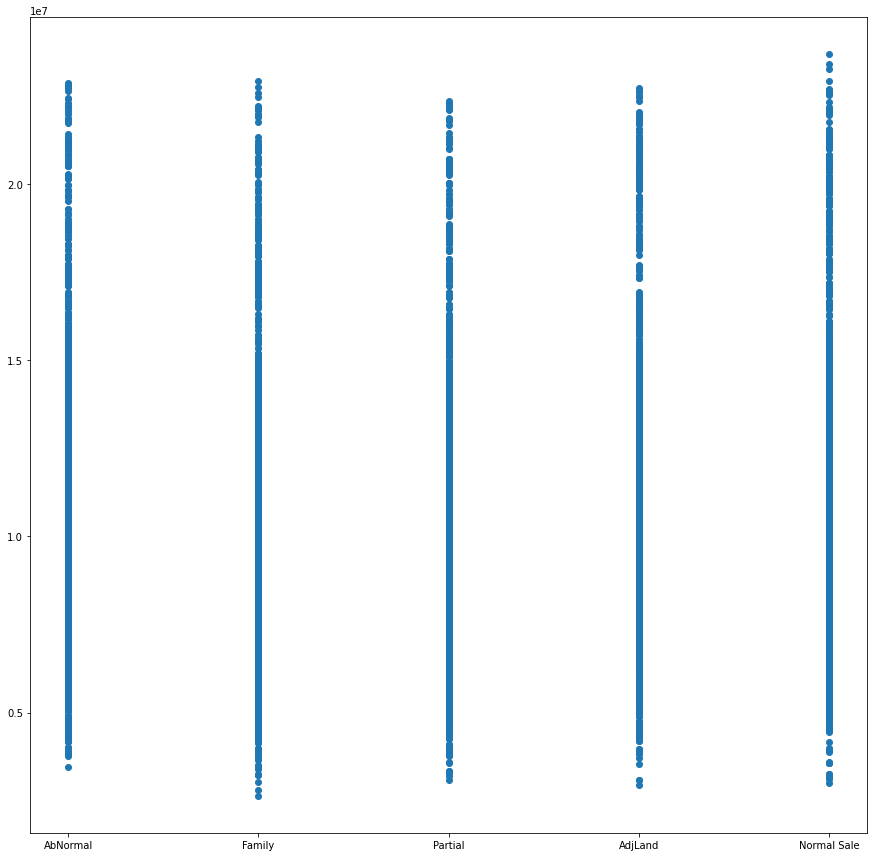

In [74]:
plt.figure(figsize=(15,15))
plt.scatter(df["SALE_COND"],df["SALES_PRICE"])

In [75]:
len(df)

7101

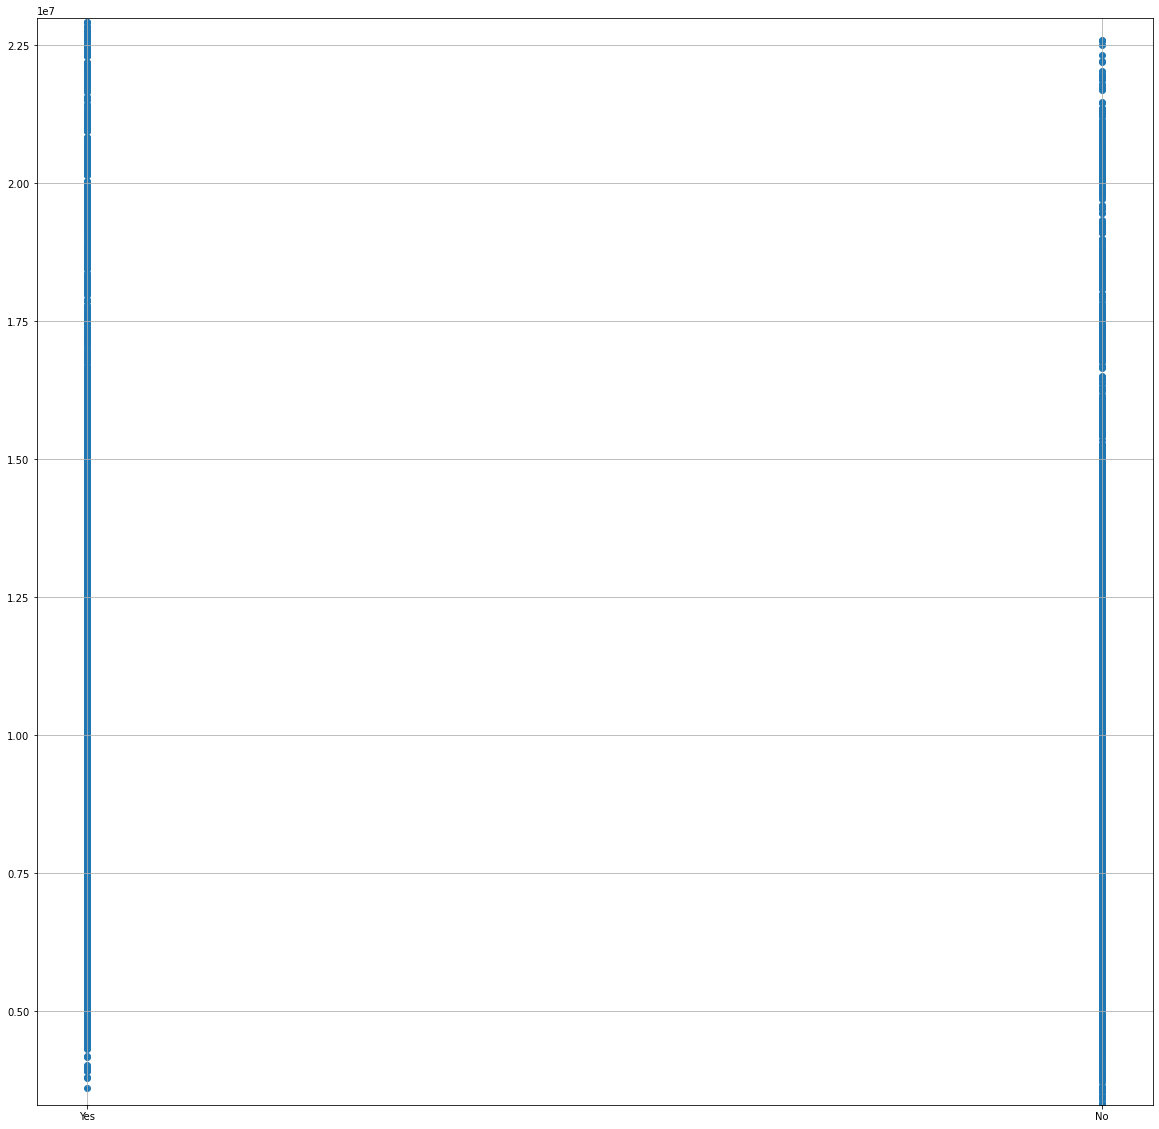

In [88]:
"""
plt.figure(figsize=(12,12))
plt.scatter(df["PARK_FACIL"],df["SALES_PRICE"])
"""
from matplotlib.ticker import (AutoMinorLocator, MultipleLocator)
fig = plt.figure(figsize=(20,20))
ax = fig.gca()
plt.scatter(df["PARK_FACIL"],df["SALES_PRICE"])
ax.set_ylim([3300000,23000000])
plt.grid(True)
plt.show()

In [94]:
df["PARK_FACIL"].value_counts()

Yes    3585
No     3516
Name: PARK_FACIL, dtype: int64

In [95]:
l = []
for i in range(0,len(df)):
    try:
        if(df["PARK_FACIL"][i] == "Yes"):
            if(df["SALES_PRICE"][i] < 3300000):
                l.append(df["SALES_PRICE"][i])
    except:
        continue

In [96]:
l

[3247750, 3210125, 3189500]

In [97]:
for i in range(0,len(df)):
    try:
        if(df["PARK_FACIL"][i] == "Yes"):
            if(df["SALES_PRICE"][i] < 3300000):
                df.drop(i,axis=0,inplace=True)
    except:
        continue

In [98]:
len(df)

7098

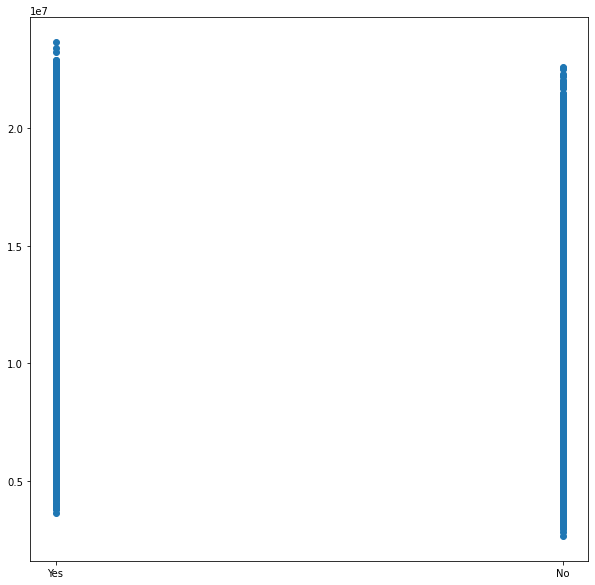

In [99]:
plt.figure(figsize=(10,10))
plt.scatter(df["PARK_FACIL"],df["SALES_PRICE"])

In [100]:
df.head()

,AREA,INT_SQFT,DIST_MAINROAD,N_BEDROOM,N_BATHROOM,N_ROOM,SALE_COND,PARK_FACIL,BUILDTYPE,UTILITY_AVAIL,STREET,MZZONE,QS_ROOMS,QS_BEDROOM,SALES_PRICE
0,Karapakkam,1004,131,1.0,1.0,3,AbNormal,Yes,Commercial,AllPub,Paved,A,4.0,4.9,7600000
1,Anna Nagar,1986,26,2.0,1.0,5,AbNormal,No,Commercial,AllPub,Gravel,RH,4.9,2.5,21717770
2,Adyar,909,70,1.0,1.0,3,AbNormal,Yes,Commercial,ELO,Gravel,RL,4.1,2.2,13159200
3,Velachery,1855,14,3.0,2.0,5,Family,No,Others,NoSewr,Paved,I,4.7,3.6,9630290
4,Karapakkam,1226,84,1.0,1.0,3,AbNormal,Yes,Others,AllPub,Gravel,C,3.0,4.1,7406250


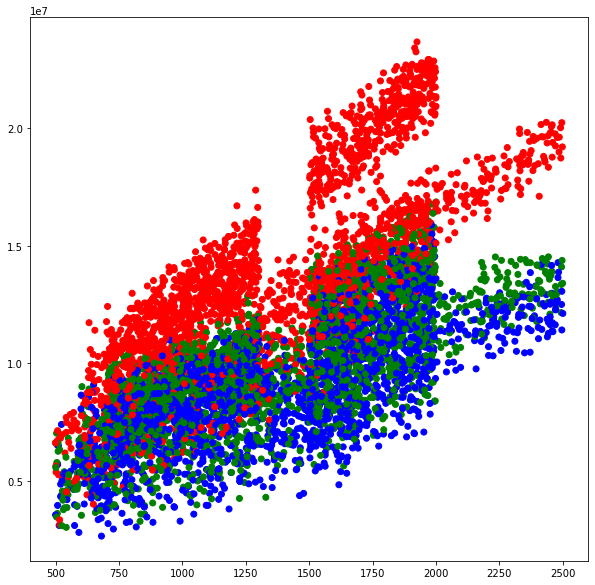

In [104]:
colors = {"Commercial" : "red" , "House" : "blue" , "Others" : "green"}
plt.figure(figsize=(10,10))
plt.scatter(df["INT_SQFT"],df["SALES_PRICE"],c=df["BUILDTYPE"].apply(lambda x:colors[x]))
plt.show()

{'whiskers': [<matplotlib.lines.Line2D at 0x202a860d0a0>,
 'caps': [<matplotlib.lines.Line2D at 0x202a860d760>,
 'boxes': [<matplotlib.lines.Line2D at 0x202a85fdd00>],
 'medians': [<matplotlib.lines.Line2D at 0x202a860ddc0>],
 'fliers': [<matplotlib.lines.Line2D at 0x202a86180d0>],
 'means': []}

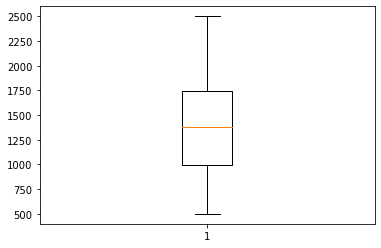

In [102]:
plt.boxplot(df["INT_SQFT"])

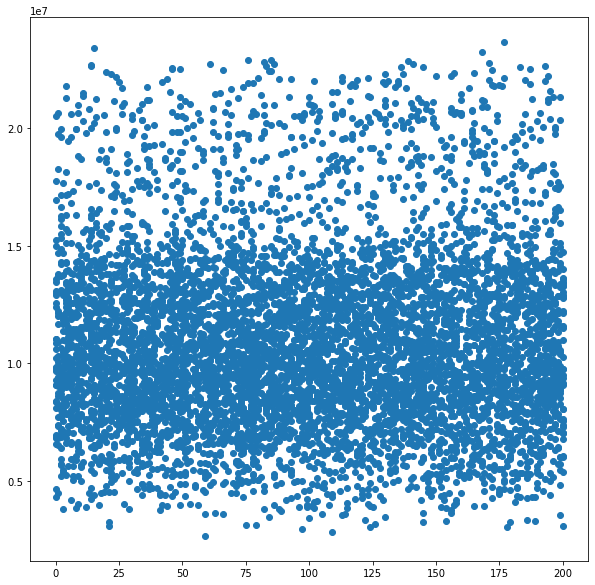

In [107]:
plt.figure(figsize=(10,10))
plt.scatter(df["DIST_MAINROAD"],df["SALES_PRICE"])
plt.show()

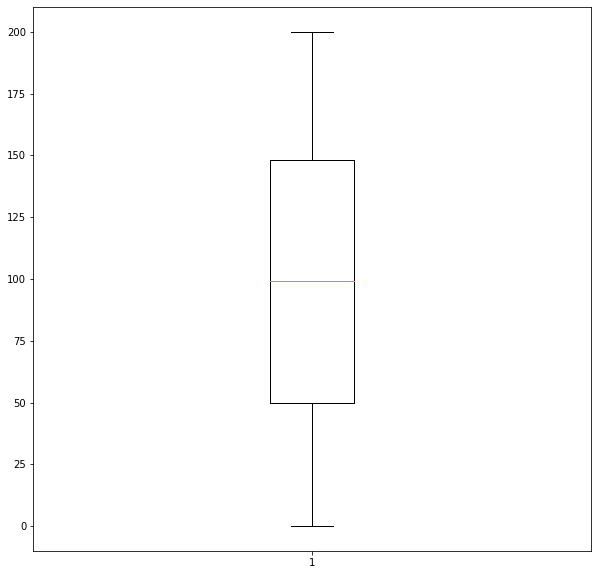

In [108]:
plt.figure(figsize=(10,10))
plt.boxplot(df["DIST_MAINROAD"])
plt.show()

In [110]:
min(df["SALES_PRICE"])

2640250

In [112]:
df["STREET"].value_counts()

Paved        2570
Gravel       2517
No Access    2011
Name: STREET, dtype: int64

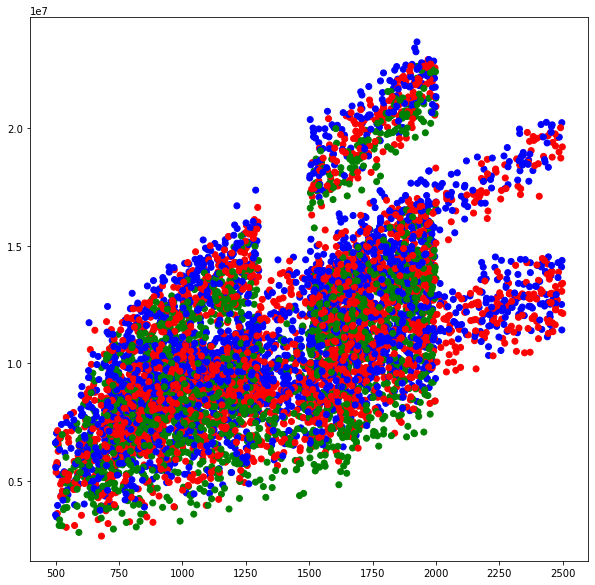

In [114]:
colors = {"Paved":"Red", "Gravel":"Blue", "No Access":"Green"}
plt.figure(figsize=(10,10))
plt.scatter(df["INT_SQFT"],df["SALES_PRICE"],c=df["STREET"].apply(lambda x:colors[x]))
plt.show()

In [115]:
df["UTILITY_AVAIL"].value_counts()

AllPub     1883
NoSeWa     1868
NoSewr     1827
ELO        1519
All Pub       1
Name: UTILITY_AVAIL, dtype: int64

In [117]:
for i in range(0,len(df)):
    try:
        if(df["UTILITY_AVAIL"][i] == "All Pub"):
            df["UTILITY_AVAIL"][i] = "AllPub"
    except:
        continue

<ipython-input-117-c4006cfd8d42>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["UTILITY_AVAIL"][i] = "AllPub"


In [118]:
df["UTILITY_AVAIL"].value_counts()

AllPub     1884
NoSeWa     1868
NoSewr     1827
ELO        1519
Name: UTILITY_AVAIL, dtype: int64

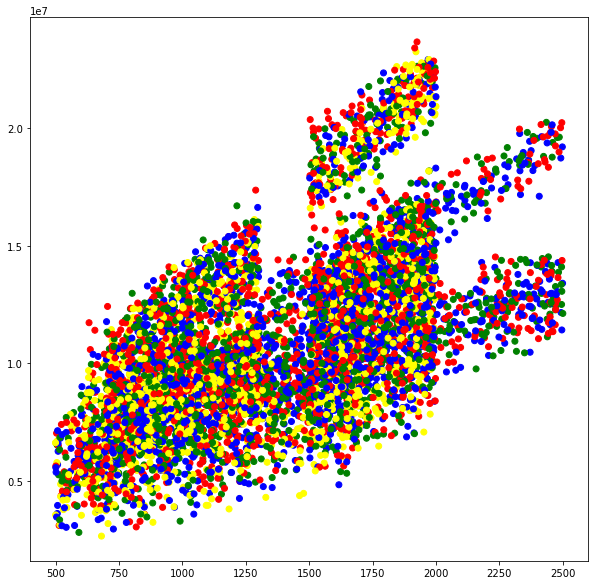

In [124]:
colors = {"AllPub":"Red", "NoSeWa":"Blue", "NoSewr ":"Green", "ELO":"Yellow"}
plt.figure(figsize=(10,10))
plt.scatter(df["INT_SQFT"],df["SALES_PRICE"],c=df["UTILITY_AVAIL"].apply(lambda x:colors[x]))
plt.show()

In [125]:
df["SALE_COND"].value_counts()

AdjLand        1438
Partial        1430
Normal Sale    1421
AbNormal       1408
Family         1401
Name: SALE_COND, dtype: int64

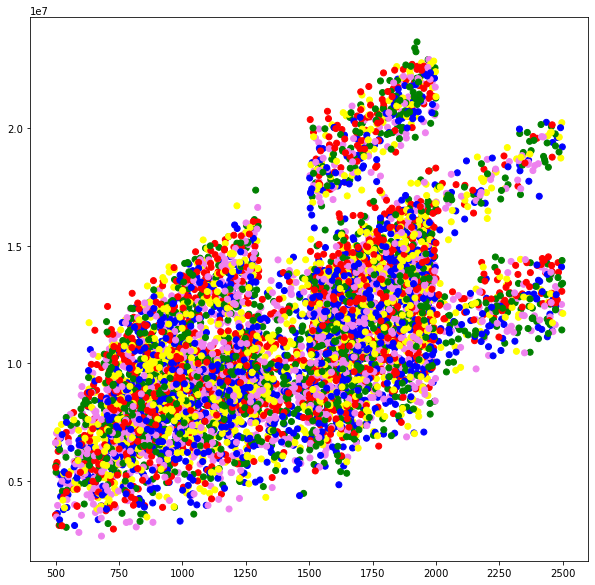

In [126]:
colors = {"AdjLand":"Red","Partial":"Blue","Normal Sale":"Green", "AbNormal":"Yellow", "Family":"Violet"}
plt.figure(figsize=(10,10))
plt.scatter(df["INT_SQFT"],df["SALES_PRICE"],c=df["SALE_COND"].apply(lambda x:colors[x]))
plt.show()

In [170]:
df.head()

,AREA,INT_SQFT,DIST_MAINROAD,N_BEDROOM,N_BATHROOM,N_ROOM,SALE_COND,PARK_FACIL,BUILDTYPE,UTILITY_AVAIL,STREET,MZZONE,QS_ROOMS,QS_BEDROOM,SALES_PRICE
0,Karapakkam,1004,131,1.0,1.0,3,AbNormal,Yes,Commercial,AllPub,Paved,A,4.0,4.9,7600000
1,Anna Nagar,1986,26,2.0,1.0,5,AbNormal,No,Commercial,AllPub,Gravel,RH,4.9,2.5,21717770
2,Adyar,909,70,1.0,1.0,3,AbNormal,Yes,Commercial,ELO,Gravel,RL,4.1,2.2,13159200
3,Velachery,1855,14,3.0,2.0,5,Family,No,Others,NoSewr,Paved,I,4.7,3.6,9630290
4,Karapakkam,1226,84,1.0,1.0,3,AbNormal,Yes,Others,AllPub,Gravel,C,3.0,4.1,7406250


## AFTER DATA EXPLORATION, DATA ANALYSIS, OUTLIER TREATMENT, FEATURE SELECTION

In [171]:
df.to_csv("final_data.csv")

In [129]:
df_n = pd.get_dummies(df)

In [133]:
x = df_n.drop("SALES_PRICE", axis=1)
y = df_n["SALES_PRICE"]

In [134]:
train_x,test_x,train_y,test_y = train_test_split(x,y,test_size=0.2,random_state=0)

In [135]:
linreg.fit(train_x,train_y)

LinearRegression()

In [136]:
train_predict = linreg.predict(train_x)

In [137]:
k = mae(train_predict,train_y)

In [138]:
k

610966.5469768303

In [139]:
test_predict = linreg.predict(test_x)
k1 = mae(test_predict,test_y)

In [140]:
k1

612773.908589346

In [161]:
from sklearn.preprocessing import PolynomialFeatures

poly = PolynomialFeatures(degree = 3)
X = poly.fit_transform(train_x)
test_X = poly.fit_transform(test_x)

In [162]:
poly = LinearRegression()

In [163]:
poly.fit(X,train_y)

LinearRegression()

In [164]:
train_poly_predict = poly.predict(X)

In [165]:
k = mae(train_poly_predict,train_y)

In [166]:
k

117339.71798718719

In [167]:
test_poly_predict = poly.predict(test_X)

In [168]:
k1 = mae(test_poly_predict,test_y)

In [169]:
k1

271298.0022774762